In [1]:
# First let's read in our dataset.

import numpy as np
import pandas as pd
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
# Removing the first column as it is unnecessary.

df = df.drop(df.columns[0],axis=1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Combining the title and text into one column.

df['news'] = df['title'] + ' ' + df['text']
df.head()

,title,text,label,news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [4]:
# Converting the REAL/FAKE labels to a binary classification.

convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df.head()

,title,text,label,news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


In [5]:
# We can now drop the first two columns.

df = df.drop([df.columns[0],df.columns[1]],axis=1)
df.head()

,label,news
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


In [6]:
# Reindex our columns.

df = df.reindex(columns=['news','label'])
df.head()

,news,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy U....,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1



We now have a dataframe consisting of input-output pairs.

Text pre-processing
Next we need to pre-process our text. There are several natural language processing techniques which we will utilise.

In [7]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

# Creating a list of stopwords (common words which are not important to the overall meaning of the article).
stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])

# Lemmatization is the process of reducing words to their basic form, e.g. dogs->dog, running->run.
WNL = WordNetLemmatizer()

# We now iterate through each article in the dataset.
for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    # Removing all punctuation using RegEx.
    article = re.sub(r'[^\w\s]', '', article)
    # Tokenization: changing the article from one continuous string to a list of tokens (words).
    words = [word.lower() for word in nltk.word_tokenize(article)]
    # Removing stopwords.
    words = [word for word in words if not word in stop_words]
    # Lemmatization and concatenating the words back into a single string.
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    
    # Replace the article with the new filtered version.
    df.loc[index, 'news'] = filtered_article
    
df.head()

,news,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporter twitter erupt anger dnc tried...,0
4,battle new york primary matter primary day new...,1


Vectorization
Machine learning algorithms expect numerical feature vectors with a fixed size as input, rather than the raw text documents with variable length which we currently have. So we use a process called vectorization, where the text is mapped to a vector of real numbers.

We are going to use a simple but effective strategy called Bag of Words, where word occurences are the only feature of the text which shall be used. So other more complicated features, such as the relative position of words in the text, are ignored.

One option is to use a simple count vectorizer. This creates a vector for each article which consists of the word count for each word in that article. However this method would then give more weighting to the less relevant words which frequently occur and less weighting to the words which rarely occur, even though these words are probably more important to the classification of the text.
Instead, we can use a Tf-idf vectorizer. Tf stands for term frequency and idf stands for inverse document frequency. So the vectorizer reduces the weighting for words which are very common and increases the weighting for words which are less common in the overall corpus.

In [8]:
# First let's split our dataframe into an input and output list. Our corpus to vectorize is df_input.
df_input = df['news']
df_output = df['label']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

In [10]:
print(tf_idf_matrix.toarray())
print(df_output.values)

labels = df_output.values
labels[1]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 0 1 1]


0

In [11]:
# Splitting the data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output.values, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)

print(Accuracy*100)

/Users/gus/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


91.28787878787878


The resulting matrix is sparse, meaning that it contains mainly 0's. This is because, for example, an article consists of 100 unique words, whereas the entire corpus consists of 1000s of words, so most word counts will be 0.

<b>Deep Learning</b>

I shall first apply a CNN architecture to the preprocessed data:

In [13]:
# setting random seed (for consistent results & choosing operating system)

from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [14]:
# installing and importanting neccessary modules (mainly Keras)

!pip install keras
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# hot encoding the data (go from binary 0 or 1 to [1,0] and [0,1] respectively)

from keras.utils import to_categorical
print("example point's binary outcome:", labels[100])
labels = to_categorical(labels)
print("same example point's one hot encoded vector:", labels[100])

example point's binary outcome: 1
same example point's one hot encoded vector: [0. 1.]


In [16]:
# resplitting data with 30 % as testing data (actually unneccesary to redo)

from sklearn.model_selection import train_test_split

x = tf_idf_matrix.toarray()
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size = 0.3)

In [17]:
# scaling the training data features. Removes mean and makes the datas variance = 1. 
# learns the correct transformation on the training data and then applies to the test data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 

x_test = scaler.transform(x_test)

In [18]:
# importing all components required in the following CNN
from keras.models import Sequential # going to use a sequential neural network
from keras.layers import Dense # type of layer
from keras.optimizers import SGD # optimisation technique (stochastic gradient descent) used to update the weights

In [19]:
print(x.shape) # 6335 different articles and 80967 different featuers per article
num_features = x.shape[1] # = 80967; the number of features there are
num_classes = len(np.unique(labels))# = 2; the number of outcomes there are
print(num_classes)

(6335, 80967)
2


In [20]:
# building neural network

model = Sequential() # its a sequential NN

model.add(Dense(32, input_dim=num_features, activation='relu')) # dense layer consisting of 32 neurons, specify number of features inputted & activation f
model.add(Dense(16, activation='relu')) # added a new layer of 16 neurons to previous layer # relu generally most useful activation f
model.add(Dense(20, activation='relu')) # if model overfitting: decrease number of neurons 
model.add(Dense(8, activation='relu')) # usually the more neurons you have the more complex the model is
model.add(Dense(num_classes, activation='softmax')) # final layer that going to compare with ground truth (correct y class label), output probability that data point belongs to each of the classes
# i.e. 3 neurons ( = num_classes)

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # build NN, specifying Loss using, how optimising weights & metric

history = model.fit(x_train, y_train, epochs=25) # fitting model on training data where epochs = how many times we pass through the entire data set
#i.e. see each data point 500 times (once through each epoch)

Epoch 1/25
139/139 [==============================] - 3s 16ms/step - loss: 0.6717 - accuracy: 0.6071
Epoch 2/25
139/139 [==============================] - 1s 7ms/step - loss: 0.3291 - accuracy: 0.9356
Epoch 3/25
139/139 [==============================] - 1s 6ms/step - loss: 0.0905 - accuracy: 0.9909
Epoch 4/25
139/139 [==============================] - 1s 6ms/step - loss: 0.0275 - accuracy: 0.9974
Epoch 5/25
139/139 [==============================] - 1s 6ms/step - loss: 0.0154 - accuracy: 0.9987
Epoch 6/25
139/139 [==============================] - 1s 8ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 7/25
139/139 [==============================] - 1s 8ms/step - loss: 0.0061 - accuracy: 0.9991
Epoch 8/25
139/139 [==============================] - 1s 8ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 9/25
139/139 [==============================] - 1s 8ms/step - loss: 0.0044 - accuracy: 0.9997
Epoch 10/25
139/139 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 0.999

In [ ]:
# building neural network

model = Sequential() # its a sequential NN

model.add(Dense(32, input_dim=num_features, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_features, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # build NN, specifying Loss using, how optimising weights & metric

history = model.fit(x_train, y_train, epochs=25)

In [21]:
loss, accuracy = model.evaluate(x_test, y_test) # evaulating the model we've trained to the test data

60/60 [==============================] - 2s 20ms/step - loss: 0.5576 - accuracy: 0.8553


Text(0, 0.5, 'loss')

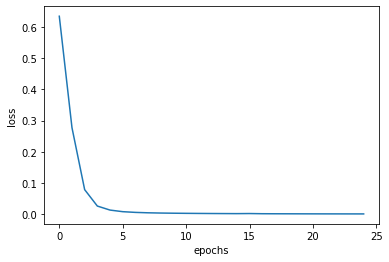

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

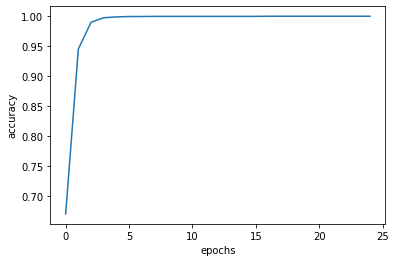

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

<b>K Nearest Neighbours (KNN) </b>

In [24]:
# separate the labels from the data frame
label_column = df.loc[:,'label']
labels = label_column.values
print(labels)
df_output.values

[0 0 1 ... 0 1 1]


array([0, 0, 1, ..., 0, 1, 1])

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets and test it on test data
model.fit(x_train, y_train)
model.score(x_test, y_test)*100

51.76223040504997

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(tf_idf_matrix, labels)
model.score(tf_idf_matrix, labels)

0.9269139700078927